In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline

In [16]:
import zipfile

### Reading Datasets 

In [17]:
fake_zip = zipfile.ZipFile('D:\PROJECTS ML\Fake.csv.zip')
fake = pd.read_csv(fake_zip.open('Fake.csv'))

In [18]:
true_zip =  zipfile.ZipFile('D:\PROJECTS ML\True.csv.zip')
true = pd.read_csv(true_zip.open('True.csv'))

In [19]:
fake.shape

(23481, 4)

In [20]:
true.shape

(21417, 4)

### Data Preparation

In [21]:
fake['target'] = 'fake'
true['target'] = 'true'

In [22]:
dt = pd.concat([fake, true]).reset_index(drop = True)
dt.shape
## dt = data

(44898, 5)

In [23]:
dt = shuffle(dt)
dt = dt.reset_index(drop=True)

In [24]:
dt.head()

,title,text,subject,date,target
0,British PM's social mobility board quits over ...,LONDON (Reuters) - All four members of the Bri...,worldnews,"December 2, 2017",true
1,TOP 5 WAYS TRUMP Can Cut Waste ASAP!,1. Disarm federal regulatory agenciesDuring an...,Government News,"Jan 2, 2017",fake
2,Fox News Managed To F*ck Themselves Out Of Ha...,Donald Trump s primary goal in life seems to b...,News,"February 27, 2016",fake
3,Barnier says 'still working' on Brexit terms w...,BERLIN (Reuters) - The European Union s chief ...,worldnews,"November 29, 2017",true
4,Donald Trump Has Become So Toxic That He Can’...,Since the coronation inauguration of Donald Tr...,News,"February 9, 2017",fake


In [25]:
dt.drop(["date"],axis=1,inplace=True)
dt.head()

,title,text,subject,target
0,British PM's social mobility board quits over ...,LONDON (Reuters) - All four members of the Bri...,worldnews,true
1,TOP 5 WAYS TRUMP Can Cut Waste ASAP!,1. Disarm federal regulatory agenciesDuring an...,Government News,fake
2,Fox News Managed To F*ck Themselves Out Of Ha...,Donald Trump s primary goal in life seems to b...,News,fake
3,Barnier says 'still working' on Brexit terms w...,BERLIN (Reuters) - The European Union s chief ...,worldnews,true
4,Donald Trump Has Become So Toxic That He Can’...,Since the coronation inauguration of Donald Tr...,News,fake


In [26]:
dt.drop(["title"],axis=1,inplace=True)
dt.head()

,text,subject,target
0,LONDON (Reuters) - All four members of the Bri...,worldnews,true
1,1. Disarm federal regulatory agenciesDuring an...,Government News,fake
2,Donald Trump s primary goal in life seems to b...,News,fake
3,BERLIN (Reuters) - The European Union s chief ...,worldnews,true
4,Since the coronation inauguration of Donald Tr...,News,fake


In [27]:
dt['text'] = dt['text'].apply(lambda x: x.lower())
dt.head()

,text,subject,target
0,london (reuters) - all four members of the bri...,worldnews,true
1,1. disarm federal regulatory agenciesduring an...,Government News,fake
2,donald trump s primary goal in life seems to b...,News,fake
3,berlin (reuters) - the european union s chief ...,worldnews,true
4,since the coronation inauguration of donald tr...,News,fake


In [28]:
import  string

In [29]:
## removing punctuation marks
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

dt['text'] = dt['text'].apply(punctuation_removal)

In [30]:
dt.head()

,text,subject,target
0,london reuters all four members of the britis...,worldnews,true
1,1 disarm federal regulatory agenciesduring an ...,Government News,fake
2,donald trump s primary goal in life seems to b...,News,fake
3,berlin reuters the european union s chief bre...,worldnews,true
4,since the coronation inauguration of donald tr...,News,fake


In [39]:

# removing stop words 
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context


In [38]:

# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# dt['text'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


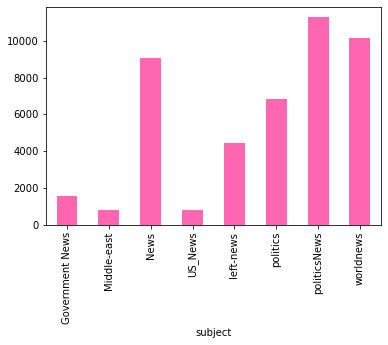

In [43]:
print(dt.groupby(['subject'])['text'].count())
dt.groupby(['subject'])['text'].count().plot(kind="bar", color= "#FF66B2")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


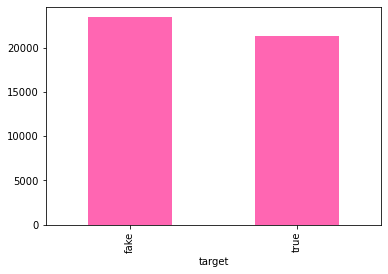

In [44]:
print(dt.groupby(['target'])['text'].count())
dt.groupby(['target'])['text'].count().plot(kind="bar", color= "#FF66B2")
plt.show()

In [46]:
!pip install wordcloud

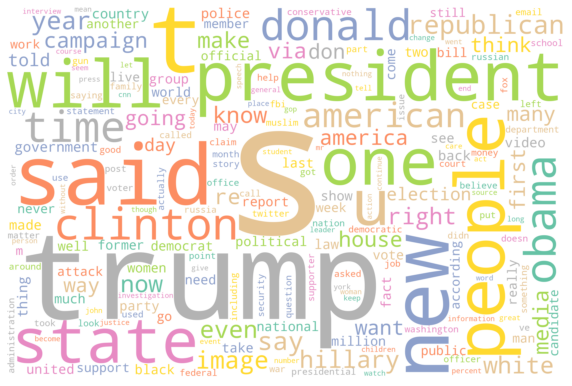

In [56]:
from wordcloud import WordCloud

fake_dt = dt[dt["target"] == "fake"]
all_words = ' '.join([text for text in fake_dt.text])

plt.figure(figsize=(10,7))
# Generate a word cloud image
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False).generate(all_words)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = '#cc0066')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

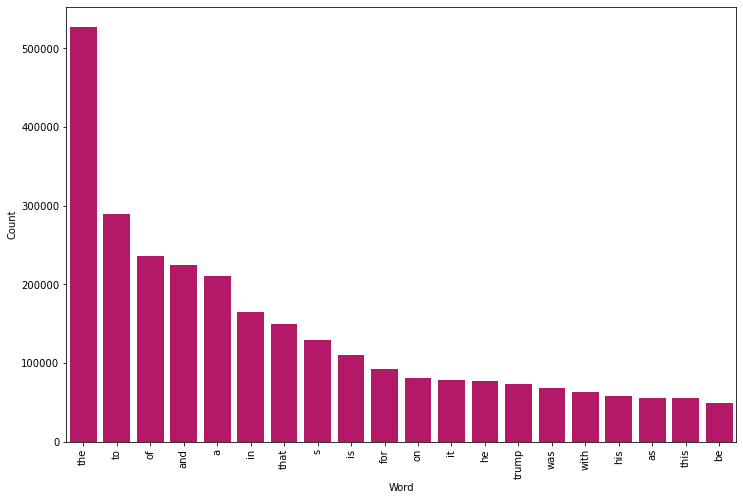

In [63]:
## most frequent words in fake news
counter(dt[dt["target"] == "fake"], "text", 20)

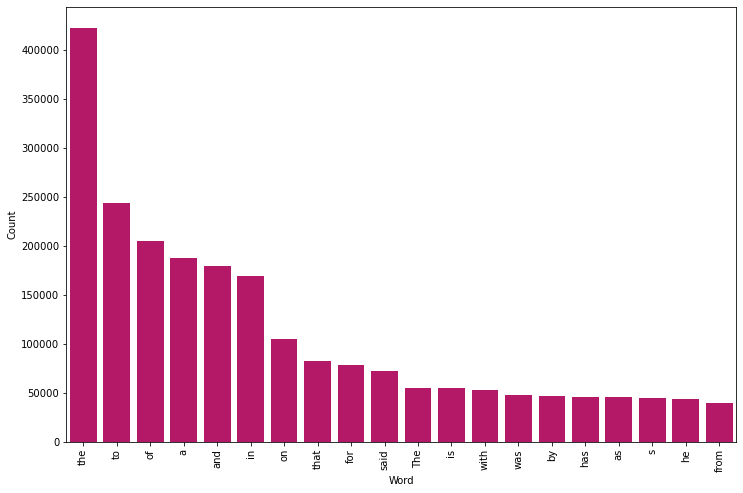

In [64]:
## most frequent words in true news
counter(data[data["target"] == "true"], "text", 20)

### Data Modelling 

In [65]:
from sklearn import metrics
import itertools

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.OrRd):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Splitting the dataset

In [81]:
X_train,X_test,y_train,y_test = train_test_split(dt['text'], dt.target, test_size=0.2, random_state=42)

### Logistic Regression

In [93]:
dct = dict()
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])


model = pipe.fit(X_train, y_train)


prediction = model.predict(X_test)

In [94]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.82%


Confusion matrix, without normalization


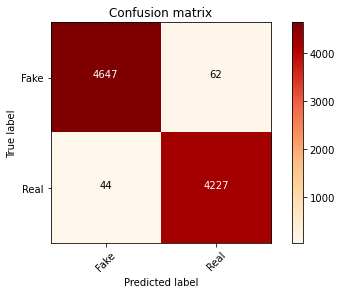

In [95]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
##sns.heatmap(cm, annot=True,cmap="OrRd")

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

In [97]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.56%


Confusion matrix, without normalization


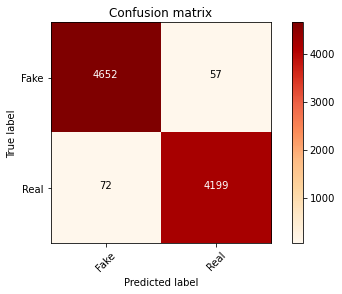

In [98]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

model = pipe.fit(X_train, y_train)


prediction = model.predict(X_test)

In [100]:
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.53%


Confusion matrix, without normalization


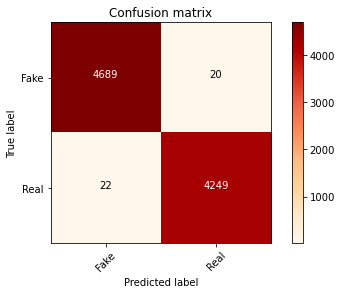

In [101]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
## sns.heatmap(cm, annot=True,cmap="OrRd")

### Comapring the three Models

([<matplotlib.axis.YTick at 0x20a5b8c54c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

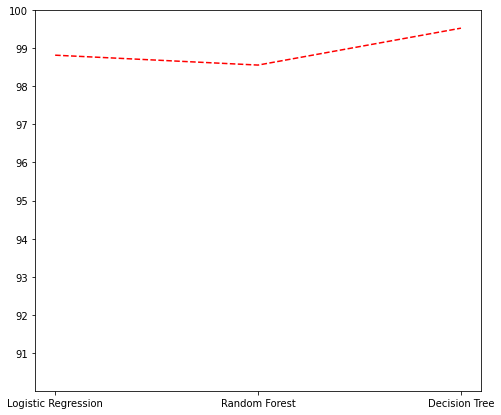

In [102]:
plt.figure(figsize=(8,7))
plt.plot(list(dct.keys()),list(dct.values()), linestyle = '--', color = 'r')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

([<matplotlib.axis.YTick at 0x20a0130f520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

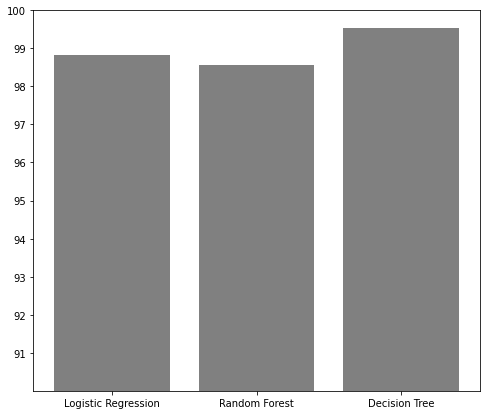

In [103]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()), color = 'grey')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))